## M. Wahyu Ramansyah
## 09011181823016
## Kecerdasan Buatan
## Kelas SK5A Indralaya

# Artificial Neural Network(ANN)
Berikut merupakan contoh kasus Artifcial Neural Network Feed Forward. Data yang digunakan merupakan dataset dari kaggle.com yang berupa data penumpang kecelakaan kapal titanic. Dataset ini dibagi menjadi 2 yaitu training dan testing.

Sumber : https://www.kaggle.com/hbaderts/simple-feed-forward-neural-network-with-tensorflow/notebook

##### Import library yang diperlukan

In [1]:
import numpy as np
import pandas as pd      
import tensorflow as tf   
from sklearn.model_selection import train_test_split

C:\Users\Acer\Anaconda3\envs\tensorf\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\Anaconda3\envs\tensorf\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\Anaconda3\envs\tensorf\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\Anaconda3\envs\tensorf\lib\site-packages\tensorflow\pyth

##### Membaca dan membersihkan dataset
Untuk membaca dataset csv digunakan library pandas.

Dataset yang digunakan hendaklah dilakukan proses feature extraction untuk membuang fitur-fitur yang tidak diperlukan.

In [2]:
df_train = pd.read_csv('train.csv')# Baca dataset csv
df_train.head(5) # Tampilkan 5 baris pertama

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Buang variabel yang tidak diperlukan yaitu PassengerId, Name, Ticket, Cabin
df_train = df_train.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)

In [4]:
# Pada kolom Sex isinya yaitu male dan female, kita hendaklah mengubah isinya menjadi female = 0 dan male = 1
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1}).astype(int) 

In [5]:
# Ganti 'Embarked' dengan tiga  dummy variables yaitu 'Embarked_S', 'Embarked_C', and 'Embarked Q',
# Akan bernilai 1 jika merupakan termasuk anggota Embarked
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked')], axis=1)
df_train = df_train.drop('Embarked', axis=1)

##### Normalisasi

Normalisasi diperlukan untuk menghasilkan data yang baik. Normalisasi juga digunakan agar mengurangi redudansi data

In [6]:
# Normalisasi 'Age' dan 'Fare' dengan cara mengurangkan dengan rata-rata kemudian dibagi dengan standar deviasi
age_mean = df_train['Age'].mean()
age_std = df_train['Age'].std()
df_train['Age'] = (df_train['Age'] - age_mean) / age_std

fare_mean = df_train['Fare'].mean()
fare_std = df_train['Fare'].std()
df_train['Fare'] = (df_train['Fare'] - fare_mean) / fare_std

In [7]:
# Hitung nilai null yang ada pada 'Age'
print("Number of missing 'Age' values: {:d}".format(df_train['Age'].isnull().sum()))

# Isi nilai null yang ada pada 'Age' dengan nilai rata-rata(mean) Age
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

Number of missing 'Age' values: 177


In [8]:
# Tampilkan dataframe yang sudah dibersihkan
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.530005,1,0,-0.502163,0,0,1
1,1,1,0,0.571430,1,0,0.786404,1,0,0
2,1,3,0,-0.254646,0,0,-0.488580,0,0,1
3,1,1,0,0.364911,1,0,0.420494,0,0,1
4,0,3,1,0.364911,0,0,-0.486064,0,0,1


In [9]:
# Konversi dataframe pandas ke numpy array
X_train = df_train.drop('Survived', axis=1).to_numpy()
y_train = df_train['Survived'].to_numpy()

# Split data menjadi training(80%) dan test(20%)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [10]:
# Bangun model klasifikasi dengan 2 class yaitu survived(1) dan didn't survive(0)
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

## Model Tensorflow (ANN)
Model neural network yang digunakan yaitu menggunakan feed forward dengan 2 hidden layer (128 dan 256 node).
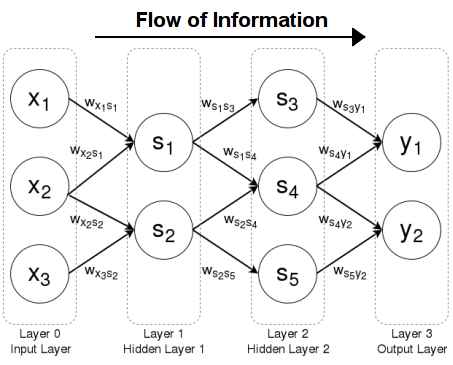


Untuk proses perhitungan model feed forwar ann secara matematis adalah sebagai berikut
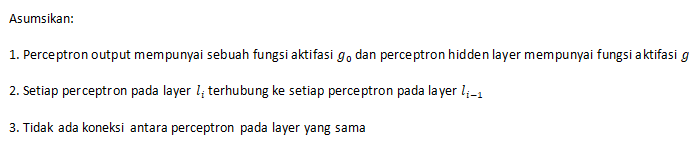

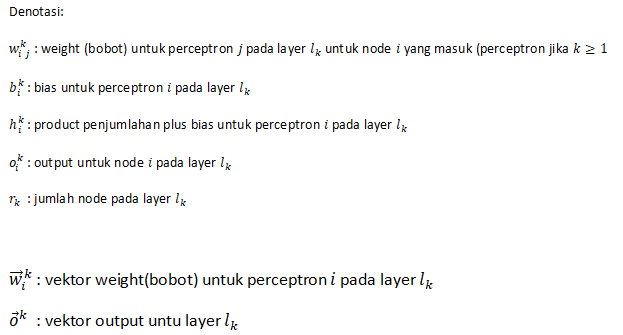

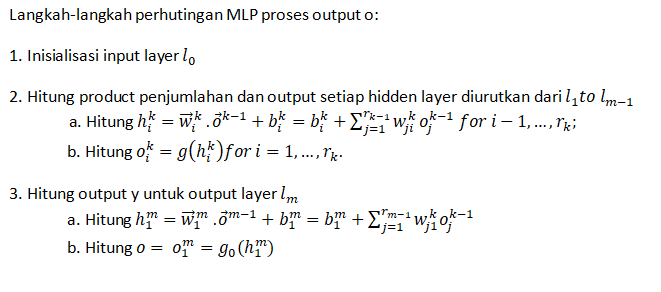

#### Fungsi aktivasi
Pada model ann ini digunakan fungsi aktivasi relu
##### ReLu (Rectified Linear Unit) 
ReLU merupakan function yang paling digunakan sampai sekarang, ini digunakan di hampir semua convex atau deep learning lainnya.
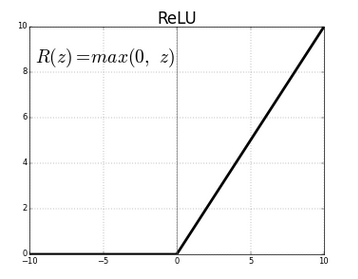

In [11]:
inputs = tf.compat.v1.placeholder(tf.float32, shape=(None, X_train.shape[1]), name='inputs')
label = tf.compat.v1.placeholder(tf.float32, shape=(None, 2), name='labels')

# First layer
hid1_size = 128
w1 = tf.Variable(tf.random_normal([hid1_size, X_train.shape[1]], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(inputs)), b1)), keep_prob=0.5)

# Second layer
hid2_size = 256
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)

# Output layer
wo = tf.Variable(tf.random_normal([2, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([2, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Outputnya merupakan softmax output, dan kita train model tersebut dengan cross entropy loss.
Selanjutnya mendefinisikan fungsi yang mana untuk memprediksi label dan akurasi dari network.

In [12]:
# Loss function and optimizer
lr = tf.placeholder(tf.float32, shape=(), name='learning_rate')
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=yo, labels=label))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

# Prediction
pred = tf.nn.softmax(yo)
pred_label = tf.argmax(pred, 1)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Train the network!

Model tersebut sudah siap untuk di training

#### Fungsi Error
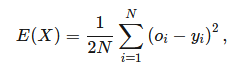

#### Delta Equations
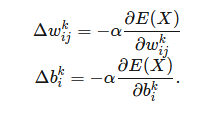

In [13]:
# Create operation which will initialize all variables
init = tf.global_variables_initializer()

# Configure GPU not to use all memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Start a new tensorflow session and initialize variables
sess = tf.InteractiveSession(config=config)
sess.run(init)

#### Epoch
Epoch adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).

Epoch yang digunakan sebanyak 50

In [14]:
# This is the main training loop: we train for 50 epochs with a learning rate of 0.05 and another 
# 50 epochs with a smaller learning rate of 0.01
for learning_rate in [0.05, 0.01]:
    for epoch in range(50):
        avg_cost = 0.0

        # For each epoch, we go through all the samples we have.
        for i in range(X_train.shape[0]):
            # Finally, this is where the magic happens: run our optimizer, feed the current example into X and the current target into Y
            _, c = sess.run([optimizer, loss], feed_dict={lr:learning_rate, 
                                                          inputs: X_train[i, None],
                                                          label: labels_train[i, None]})
            avg_cost += c
        avg_cost /= X_train.shape[0]    

        # Print the cost in this epcho to the console.
        if epoch % 10 == 0:
            print("Epoch: {:3d}    Train Cost: {:.4f}".format(epoch, avg_cost))

Epoch:   0    Train Cost: 0.6709
Epoch:  10    Train Cost: 0.5099
Epoch:  20    Train Cost: 0.5106
Epoch:  30    Train Cost: 0.5358
Epoch:  40    Train Cost: 0.5064
Epoch:   0    Train Cost: 0.4843
Epoch:  10    Train Cost: 0.4326
Epoch:  20    Train Cost: 0.4158
Epoch:  30    Train Cost: 0.4045
Epoch:  40    Train Cost: 0.4288


#### Akurasi Training dan Test data
Hitung akurasi dari data training dan akurasi dari data test

In [15]:
acc_train = accuracy.eval(feed_dict={inputs: X_train, label: labels_train})
print("Train accuracy: {:3.2f}%".format(acc_train*100.0))

acc_test = accuracy.eval(feed_dict={inputs: X_test, label: labels_test})
print("Test accuracy:  {:3.2f}%".format(acc_test*100.0))

Train accuracy: 83.99%
Test accuracy:  81.01%


## Prediksi Data Baru

Jika kita telah puas dengan tingkat akurasi yang diinginkan. Maka model yang telah dibuat dapat digunakan untuk memprediksi data baru yang dimasukkan

In [16]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
# Do all pre-processing steps as above
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1}).astype(int)
df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')], axis=1)
df_test = df_test.drop('Embarked', axis=1)
df_test['Age'] = (df_test['Age'] - age_mean) / age_std
df_test['Fare'] = (df_test['Fare'] - fare_mean) / fare_std
df_test.head()
X_test = df_test.drop('PassengerId', axis=1).to_numpy()

In [18]:
# Predict
for i in range(X_test.shape[0]):
    df_test.loc[i, 'Survived'] = sess.run(pred_label, feed_dict={inputs: X_test[i, None]}).squeeze()

In [19]:
# Important: close the TensorFlow session, now that we're finished.
sess.close()

Setelah selesai hasil prediksi di konversi ke file .csv

In [20]:
output = pd.DataFrame()
output['PassengerId'] = df_test['PassengerId']
output['Survived'] = df_test['Survived'].astype(int)
output.to_csv('./prediction.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
